
O Código realizado busca criar um modelo que seja capaz de predizer se é seguro ou não para um banco conceder ou não à uma pessoa determinada quantia baseada no quanto essa pessoa tem na conta e em sua idade. O algoritmo usado pelo modelo é a Máquina de vetores de suporte.

This Code aims to create a model wich is capable to predict if it is safe or not for a bank to provides or not for a person a determined loan to someone based on this person's age and income. The algorithm used by the model is the Support Vector Machine.


Importando as bibliotecas:

Importing the libraries:


In [101]:

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



Carregando a Base de Dados:

Loading the Database:


In [102]:

data = pd.read_csv('base01.csv')
print(data.head(20))


    i#clientid        income        age         loan  c#default
0            1  66155.925095  59.017015  8106.532131          0
1            2  34415.153966  48.117153  6564.745018          0
2            3  57317.170063  63.108049  8020.953296          0
3            4  42709.534201  45.751972  6103.642260          0
4            5  66952.688845  18.584336  8770.099235          1
5            6  24904.064140  57.471607    15.498598          0
6            7  48430.359613  26.809132  5722.581981          0
7            8  24500.141984  32.897548  2971.003310          1
8            9  40654.892537  55.496853  4755.825280          0
9           10  25075.872771  39.776378  1409.230371          0
10          11  64131.415372  25.679575  4351.028971          0
11          12  59436.847123  60.471936  9254.244538          0
12          13  61050.346079  26.355044  5893.264659          0
13          14  27267.995458  61.576776  4759.787581          0
14          15  63061.960174  39.201553 


Após uma breve análise é observado que a primeira coluna contém apenas os IDs das pessoas, que são desnecessários:

After a brief analysis is observed that the first column contains just the people IDs, which are unnecessary:



Separando os dados em alvo e preditores:

Spliting the database into target and the predictors:


In [103]:

target = data.iloc[:,4]
predictors = data.iloc[:,1:4]



A Base de dados tem alguns valores inválidos no campo de idade (números negativos). Esses dados são substituidos pela média de idade:

The Database has a few invalid values on the 'Age' field (negative numbers). These data are replaced by the age mean:


In [104]:

age_mean = predictors['age'].loc[predictors['age']>0].mean()
predictors['age'].loc[predictors['age']<0] = age_mean



Alguns outros valores nulos do mesmo campo recebem o mesmo tratamento, usando o Simple Imputer:

Some others null values on the same field also receive the same treatment, using a Simple Imputer:


In [105]:

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(predictors)
predictors = imp.transform(predictors)



Escalonar os preditores irá aumentar a eficiência do modelo

Staggering the predictors will raise the model's eficiency:


In [106]:

scaler = StandardScaler()
predictors = scaler.fit_transform(predictors)



O alvo e os preditores são separados nos dados de treinamento e de teste (tamanho do teste = 20%):

 The target and the predictors are both separeted in training and testing data (test size = 20%):
 

In [107]:

predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size = 0.2)



O modelo é treinado através de um SVM (que, nesse caso, tem a maior precisão usando kernel = 'rbf'e C=1.5):

The model is trained using a Support Machine Vector (which, in this case, has the best accuracy using kernel ='rbf' and C=1.5):


In [108]:

classifier = SVC(random_state=1, C=1.5)
classifier.fit(predictors_train, target_train)


SVC(C=1.5, random_state=1)


Para se medir a precisão do modelo, é necessário comparar as previsões feitas por ele, usando o predictors_test, e compará-lo com o target_test.

In order to measure how accurate was the model, is needed to compare the predictions made by it, using the predictors_test, and compare it with the target_test.


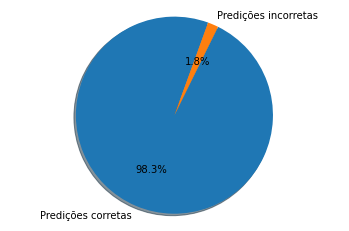

In [109]:
predictions = classifier.predict(predictors_test)
accuracy = accuracy_score(predictions, target_test)
labels = 'Predições corretas', 'Predições incorretas'
sizes = [accuracy, 1-accuracy] 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, shadow=True, startangle=70, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

A precisão do modelo é por volta de 98%. Dessa forma se o banco confiar no modelo para conceder ou não o empréstimo, a decisão 'certa' será tomada em 98% dos casos.

The accuracy of the model is about 98%. So, if the bank rely on the model to provide or not the loan the 'right' decision will be taken in 98% of the cases.